# Testing of Spectral Element Method using Fourier Series basis



In [9]:
# Prepare path for import of the spectral element package
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.path.abspath("__file__")), '../')))

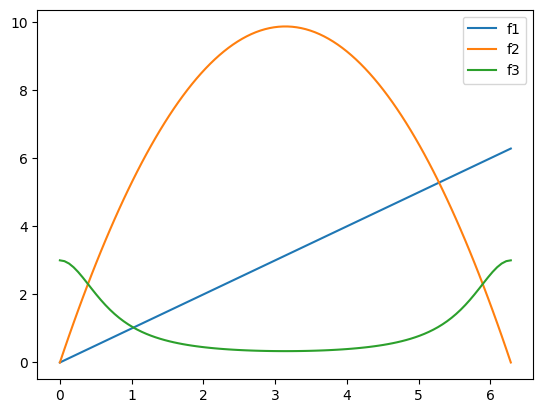

In [10]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt

# Test functions
f1 = lambda x: x
f2 = lambda x: x * (2. * pi - x)
f3 = lambda x: 3. / (5. - 4. * np.cos(1. * x))

# Plot the functions in the interval -1 to 1
pts = np.linspace(0, 2*pi, 100)
plt.plot(pts, f1(pts))
plt.plot(pts, f2(pts))
plt.plot(pts, f3(pts))
plt.legend(['f1', 'f2', 'f3']);


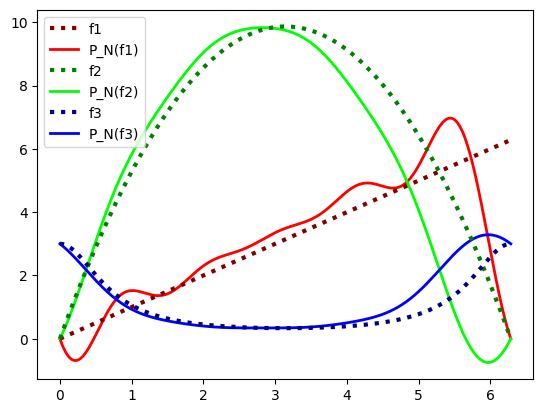

In [17]:
from spectral_elements.fourier import DiscreteFourierCoefficients, FourierInterpolantFromModes

# Compare the interpolant with the original function
N = 10
nodes = np.linspace(0, 2 * pi, N)
pts = np.linspace(0, 2 * pi, 1000)

coef1 = DiscreteFourierCoefficients(f1(nodes))
P_N_f1 = FourierInterpolantFromModes(coef1, pts)
coef2 = DiscreteFourierCoefficients(f2(nodes))
P_N_f2 = FourierInterpolantFromModes(coef2, pts)
coef3 = DiscreteFourierCoefficients(f3(nodes))
P_N_f3 = FourierInterpolantFromModes(coef3, pts)

style_function = dict(linestyle='dotted', linewidth=3, zorder=2)
style_fourier = dict(linestyle='solid', linewidth=2, zorder=1)

plt.plot(pts, f1(pts), color=[0.5, 0, 0], **style_function)
plt.plot(pts, P_N_f1, color=[1, 0, 0], **style_fourier)
plt.plot(pts, f2(pts), color=[0, 0.5, 0], **style_function)
plt.plot(pts, P_N_f2, color=[0, 1, 0], **style_fourier)
plt.plot(pts, f3(pts), color=[0, 0, 0.5], **style_function)
plt.plot(pts, P_N_f3, color=[0, 0, 1], **style_fourier)

plt.legend(['f1', 'P_N(f1)', 'f2', 'P_N(f2)', 'f3', 'P_N(f3)'])

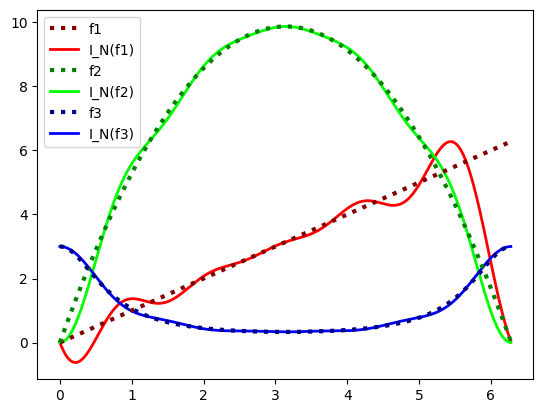

In [12]:
import numpy as np
from spectral_elements.fourier import FourierInterpolantFromNodes

# Compare the interpolant with the original function
N = 10
nodes = np.ndarray([N,])
for j in range(N):
    nodes[j] = 2 * pi * j / N

pts = np.linspace(0, 2*pi, 2000)
pts = pts[0:-2]
style_function = dict(linestyle='dotted', linewidth=3, zorder=2)
style_fourier  = dict(linestyle='solid', linewidth=2, zorder=1)

plt.plot(pts, f1(pts), color=[0.5, 0, 0], **style_function)
plt.plot(pts, FourierInterpolantFromNodes(pts, nodes, f1(nodes)), color=[1, 0, 0], **style_fourier)
plt.plot(pts, f2(pts), color=[0, 0.5, 0], **style_function)
plt.plot(pts, FourierInterpolantFromNodes(pts, nodes, f2(nodes)), color=[0, 1, 0], **style_fourier)
plt.plot(pts, f3(pts),color=[0, 0, 0.5], **style_function)
plt.plot(pts, FourierInterpolantFromNodes(pts, nodes, f3(nodes)), color=[0, 0, 1], **style_fourier)

plt.legend(['f1', 'I_N(f1)', 'f2', 'I_N(f2)', 'f3', 'I_N(f3)']);

<Figure size 640x480 with 0 Axes>

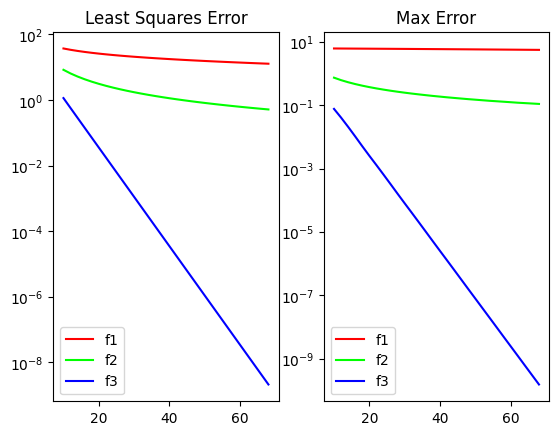

In [13]:
N = range(10, 70, 2)
pts = np.linspace(0, 2 * pi, 1000)
pts = pts[1:-2]

F1 = f1(pts)
F2 = f2(pts)
F3 = f3(pts)

error1_2_norm = []
error1_max_norm = []
error2_2_norm = []
error2_max_norm = []
error3_2_norm = []
error3_max_norm = []

# Compare the interpolant with the original function
for n in N:

    nodes = np.ndarray([n,])
    for j in range(n):
        nodes[j] = 2 * pi * j / n

    I_N_f1 = FourierInterpolantFromNodes(pts, nodes, f1(nodes))

    error1_2_norm.append(np.linalg.norm(F1 - I_N_f1))
    error1_max_norm.append(np.linalg.norm(F1 - I_N_f1, np.inf))

    I_N_f2 = FourierInterpolantFromNodes(pts, nodes, f2(nodes))
    error2_2_norm.append(np.linalg.norm(F2 - I_N_f2))
    error2_max_norm.append(np.linalg.norm(F2 - I_N_f2, np.inf))

    I_N_f3 = FourierInterpolantFromNodes(pts, nodes, f3(nodes))
    error3_2_norm.append(np.linalg.norm(F3 - I_N_f3))
    error3_max_norm.append(np.linalg.norm(F3 - I_N_f3, np.inf))

plt.suptitle('Error in Fourier Interpolation')
_, subplots = plt.subplots(1, 2)

subplots[0].semilogy(N, error1_2_norm, color=[1, 0, 0])
subplots[0].semilogy(N, error2_2_norm, color=[0, 1, 0])
subplots[0].semilogy(N, error3_2_norm, color=[0, 0, 1])

subplots[0].set_title('Least Squares Error')
subplots[0].legend(['f1', 'f2', 'f3']);

subplots[1].semilogy(N, error1_max_norm, color=[1, 0, 0])
subplots[1].semilogy(N, error2_max_norm, color=[0, 1, 0])
subplots[1].semilogy(N, error3_max_norm, color=[0, 0, 1])

subplots[1].set_title('Max Error')
subplots[1].legend(['f1', 'f2', 'f3']);